# Notebook: 01 - EDA on Fraud Data

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
sns.set(style="whitegrid")

In [2]:
# Load Cleaned Fraud Data
data_path = Path("../../data/processed/cleaned_fraud_data.csv")
df = pd.read_csv(data_path)
df.head()

,purchase_value,age,hour_of_day,day_of_week,time_since_signup,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,class
0,-0.160204,0.679914,-1.377455,0.991020,-0.136057,False,True,False,False,False,False,True,0
1,-1.142592,2.304476,-1.522122,-1.501259,-1.571877,False,False,False,False,False,False,False,0
2,-1.197169,2.304476,0.937208,-0.005891,-1.577617,False,True,False,False,True,False,True,1
3,0.385567,0.911994,0.213876,-1.501259,-1.420213,False,True,False,False,False,True,True,0
4,0.112681,1.376155,0.937208,-0.504347,-0.182509,False,False,False,False,False,True,True,0


## Univariate Analysis

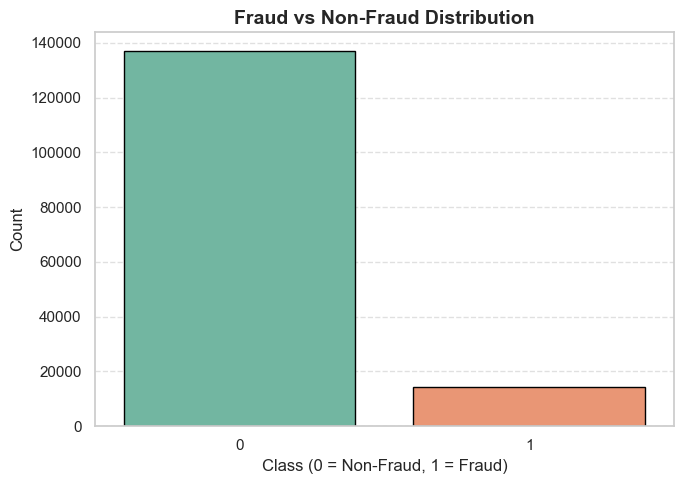

In [12]:
plt.figure(figsize=(7, 5))

sns.countplot(
    x="class", 
    data=df, 
    hue="class",             # Explicitly specify hue
    palette="Set2", 
    edgecolor="black",
    dodge=False,             # Prevent bar separation
    legend=False             # Avoid redundant legend
)

plt.title("Fraud vs Non-Fraud Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


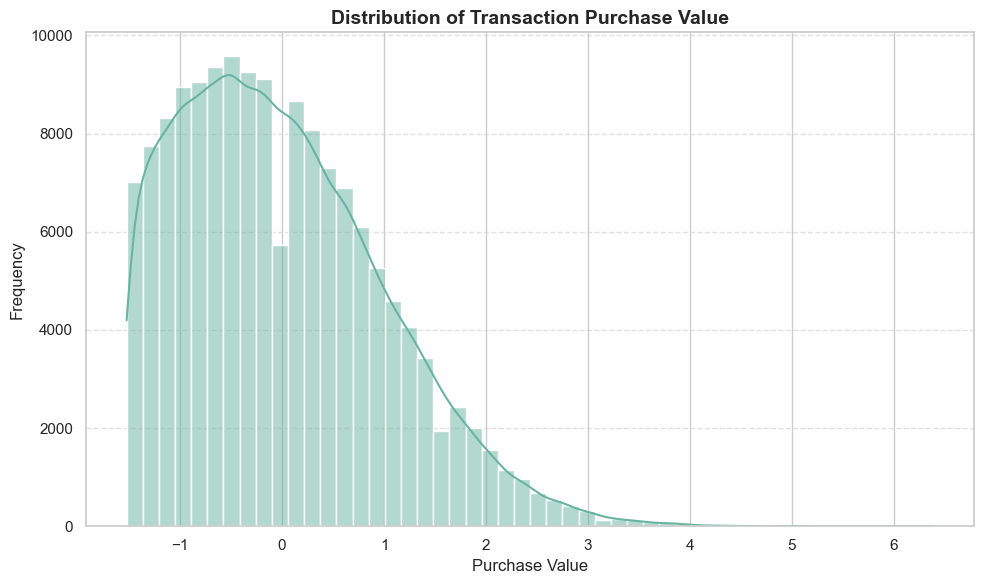

In [10]:
plt.figure(figsize=(10, 6))

sns.histplot(
    data=df,
    x="purchase_value",
    bins=50,
    kde=True,
    color="#69b3a2",
    edgecolor="white"
)

plt.title("Distribution of Transaction Purchase Value", fontsize=14, fontweight='bold')
plt.xlabel("Purchase Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Bivariate Analysis

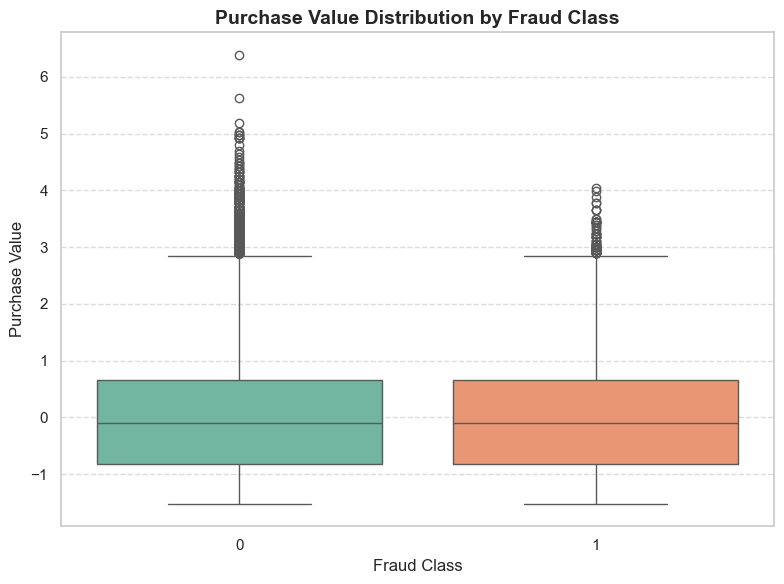

In [9]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    x="class", 
    y="purchase_value", 
    data=df,
    hue="class",              # Add this line
    palette="Set2",
    dodge=False,              # Prevent shifting of boxes due to hue
    legend=False              # Avoid adding legend since hue is same as x
)

plt.title("Purchase Value Distribution by Fraud Class", fontsize=14, fontweight='bold')
plt.xlabel("Fraud Class", fontsize=12)
plt.ylabel("Purchase Value", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


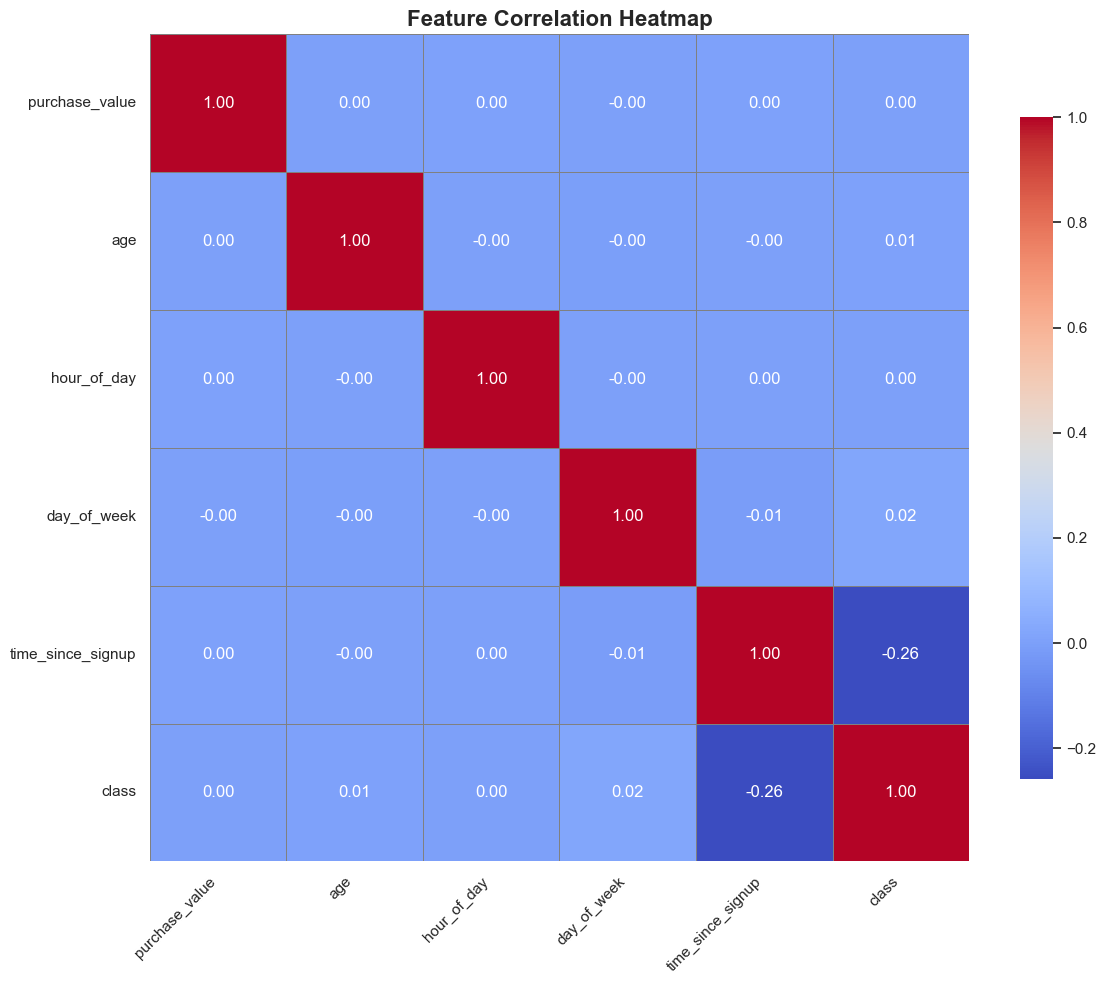

In [7]:
# Calculate correlation matrix for numeric features
corr = df.select_dtypes(include=[np.number]).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    annot=True,              # Show correlation values
    fmt=".2f",               # Format to 2 decimal places
    cmap="coolwarm",         # Color palette
    linewidths=0.5,          # Lines between cells
    linecolor='gray',
    cbar_kws={"shrink": 0.8} # Colorbar size
)

plt.title("Feature Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit labels

plt.show()